In [1]:
#importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preprocessing

In [2]:
#loading the data into pandas dataframe.
data=pd.read_excel('Dataset_Question2.xlsx')
data.loc[:,'Test']=data.loc[:,'Test']=='Pass'

In [3]:
data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration,Test
0,406.86,17.66,121.83,2109.20,0.1033,True
1,693.39,24.66,133.18,3138.96,0.3785,True
2,523.10,23.23,146.55,1058.24,0.4799,False
3,612.86,40.97,94.44,1325.12,0.3147,False
4,500.28,37.44,185.48,2474.51,0.2284,True


In [4]:
#mean of the dataset represented feature wise.
data.mean(axis=0)[0:5]

Temperature                      546.766430
Pressure                          25.493270
Feed Flow rate                   125.029060
Coolant Flow rate               2295.797770
Inlet reactant concentration       0.302692
dtype: float64

In [5]:
#variance of the dataset represented feature wise.
data.var(axis=0)[0:5]

Temperature                       7544.447741
Pressure                           203.131114
Feed Flow rate                    1892.959914
Coolant Flow rate               583208.097420
Inlet reactant concentration         0.013470
dtype: float64

In [6]:
#splitting 70% of the data into training data and rest into testing data.
train_data=data.sample(frac=0.7,random_state=58)
train_data_targets=train_data.loc[:,'Test']
train_data=train_data.iloc[:,0:5]
test_data=data.drop(train_data.index)
test_data_targets=test_data.loc[:,'Test']
test_data=test_data.iloc[:,0:5]

In [7]:
train_data.shape

(700, 5)

In [8]:
train_data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
595,480.88,6.39,118.26,2554.76,0.1584
604,659.99,31.68,143.51,1569.74,0.4967
570,485.34,38.17,141.96,2628.79,0.4236
826,450.28,18.21,192.95,1151.09,0.4559
277,540.10,8.51,53.28,2739.59,0.1699


In [9]:
test_data.shape

(300, 5)

In [10]:
test_data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
1,693.39,24.66,133.18,3138.96,0.3785
5,413.67,44.19,84.87,3036.71,0.3293
11,591.40,34.51,109.68,2532.66,0.1111
14,474.59,25.79,195.14,1610.85,0.1822
20,618.82,44.37,156.57,2099.16,0.4327


# Normalizing Data
Normalizing the given data using the given ranges of input features in the question.
* Temperature: 400-700 K
* Pressure: 1-50 bar
* Feed Flow Rate: 50-200 kmol/hr
* Coolant Flow Rate: 1000-3600 L/hr
* Inlet Reactant Concentration: 0.1-0.5 mole fraction

By doing the following normalization all the input features will be scaled to range 0 to 1.

In [11]:
train_data.loc[:,'Temperature']=(train_data.loc[:,'Temperature']-400)/300.0
train_data.loc[:,'Pressure']=(train_data.loc[:,'Pressure']-1)/49.0
train_data.loc[:,'Feed Flow rate']=(train_data.loc[:,'Feed Flow rate']-50)/150.0
train_data.loc[:,'Coolant Flow rate']=(train_data.loc[:,'Coolant Flow rate']-1000)/2600.0
train_data.loc[:,'Inlet reactant concentration']=(train_data.loc[:,'Inlet reactant concentration']-0.1)/0.4

In [12]:
train_data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
595,0.269600,0.110000,0.455067,0.597985,0.14600
604,0.866633,0.626122,0.623400,0.219131,0.99175
570,0.284467,0.758571,0.613067,0.626458,0.80900
826,0.167600,0.351224,0.953000,0.058112,0.88975
277,0.467000,0.153265,0.021867,0.669073,0.17475


In [13]:
test_data.loc[:,'Temperature']=(test_data.loc[:,'Temperature']-400)/300.0
test_data.loc[:,'Pressure']=(test_data.loc[:,'Pressure']-1)/49.0
test_data.loc[:,'Feed Flow rate']=(test_data.loc[:,'Feed Flow rate']-50)/150.0
test_data.loc[:,'Coolant Flow rate']=(test_data.loc[:,'Coolant Flow rate']-1000)/2600.0
test_data.loc[:,'Inlet reactant concentration']=(test_data.loc[:,'Inlet reactant concentration']-0.1)/0.4

In [14]:
test_data.head()

,Temperature,Pressure,Feed Flow rate,Coolant Flow rate,Inlet reactant concentration
1,0.977967,0.482857,0.554533,0.822677,0.69625
5,0.045567,0.881429,0.232467,0.783350,0.57325
11,0.638000,0.683878,0.397867,0.589485,0.02775
14,0.248633,0.505918,0.967600,0.234942,0.20550
20,0.729400,0.885102,0.710467,0.422754,0.83175


In [15]:
# converting the train and test data into numpy arrays. 
train_data=train_data.to_numpy()
train_data_targets=train_data_targets.to_numpy()
train_data_targets=np.reshape(train_data_targets,(train_data_targets.shape[0],1))
test_data=test_data.to_numpy()
test_data_targets=test_data_targets.to_numpy()
test_data_targets=np.reshape(test_data_targets,(test_data_targets.shape[0],1))

In [16]:
#finding rank of the training dataset.
print('rank of the input training matrix: ',np.linalg.matrix_rank(train_data))

rank of the input training matrix:  5


# Cost Function
cross-entropy loss function is used here.

In [17]:
def cost(output,target):
    return -target*np.log(output)-(1.0-target)*np.log(1.0-output)

# Sigmoid function

In [18]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

 ## Gradient Descent optimizer
 This function will execute one step of gradient descent.

In [19]:
def optimizer_step(w,b,X,Y,alpha):
    m=X.shape[0]
    Z=sigmoid(np.dot(X,w)+b)
    L=(1/m)*np.sum(cost(Z,Y))
    
    w_grad=np.reshape((1/m)*np.sum(X*(Z-Y),axis=0),(5,1))
    b_grad=(1/m)*np.sum(Z-Y)
    
    w=w-alpha*w_grad
    b=b-alpha*b_grad
    
    return [L,w,b]

## Model Trainer
This function will train the model for given number of epochs

In [20]:
def train_model(X_train,Y_train,X_val,Y_val,w_initial,b_initial,num_iters,learning_rate=0.1):
    w=w_initial
    b=b_initial
    m=Y_train.shape[0]
    n=Y_val.shape[0]
    Loss_matrix=np.zeros(num_iters)
    train_acc=np.zeros(num_iters)
    val_acc=np.zeros(num_iters)
    for i in range(num_iters):
        Loss_matrix[i],w,b=optimizer_step(w,b,X_train,Y_train,alpha=learning_rate)
        train_acc[i]=np.sum(predictor(X_train,w,b)==Y_train)/float(m)
        val_acc[i]=np.sum(predictor(X_val,w,b)==Y_val)/float(n)
        if (i+1)%50==0:
            print('#iteration:%d => training accuracy: %f & test_acc: %f'%(i+1,train_acc[i]*100,val_acc[i]*100))
    print('w,b at the end of %d iterations are:'%num_iters,w,b)
    f1=plt.figure();ax1=f1.add_subplot(111)
    ax1.plot(Loss_matrix.tolist())
    plt.title("training loss vs iterations")
    plt.xlabel("# iterations")
    plt.ylabel("training_loss")
    f2=plt.figure();ax2=f2.add_subplot(111)
    ax2.plot(train_acc.tolist(),'g',val_acc.tolist(),'r')
    plt.legend(['train_acc','val_acc'])
    plt.title("accuracies vs iterations")
    plt.xlabel("# iterations")
    plt.ylabel("accuracy")
    plt.show()
    return [w,b]

## Confusion Matrix, Precision, Recall, F1 Score
Function to calculate confusion matrix, precision, recall and F1 score.

In [21]:
def confusion_matrix_precision_recall_f1_score(true_labels,predicted_labels):
    total=true_labels.shape[0]
    temp_1=true_labels+predicted_labels
    temp_2=true_labels!=predicted_labels
    TP=np.sum(temp_1==2)
    TN=np.sum(temp_1==0)
    FN=np.sum(true_labels*temp_2)
    FP=total-(TP+TN+FN)
    precision=float(TP)/(TP+FP)
    recall=float(TP)/(TP+FN)
    F1_score=2*(precision*recall)/(precision+recall)
    return [TP,TN,FP,FN,precision,recall,F1_score]

## Function to initialize weights

In [22]:
def weights_initializer():
    w=np.zeros((5,1),dtype=np.float)
    b=0.0
    
    return w,b

## Predictor  function
This function will predict the label by passing input and parameter values.

In [23]:
def predictor(X,w,b):
    predictions=np.zeros((X.shape[0],1),dtype=np.int)
    predictions=sigmoid(np.dot(X,w)+b)>=0.5
    return predictions+0

In [24]:
#initializing the weights(parameters) of the model.
w_initial,b_initial=weights_initializer()

## Training the model
The command below will train the model for 1000 epochs with zero initilization

#iteration:50 => training accuracy: 59.428571 & test_acc: 56.333333
#iteration:100 => training accuracy: 63.428571 & test_acc: 62.000000
#iteration:150 => training accuracy: 77.000000 & test_acc: 69.333333
#iteration:200 => training accuracy: 81.571429 & test_acc: 80.000000
#iteration:250 => training accuracy: 84.000000 & test_acc: 84.666667
#iteration:300 => training accuracy: 86.285714 & test_acc: 88.333333
#iteration:350 => training accuracy: 87.857143 & test_acc: 89.333333
#iteration:400 => training accuracy: 89.142857 & test_acc: 91.000000
#iteration:450 => training accuracy: 90.285714 & test_acc: 92.333333
#iteration:500 => training accuracy: 91.000000 & test_acc: 93.333333
#iteration:550 => training accuracy: 91.000000 & test_acc: 93.666667
#iteration:600 => training accuracy: 91.285714 & test_acc: 93.666667
#iteration:650 => training accuracy: 91.857143 & test_acc: 93.666667
#iteration:700 => training accuracy: 92.714286 & test_acc: 94.000000
#iteration:750 => training accuracy

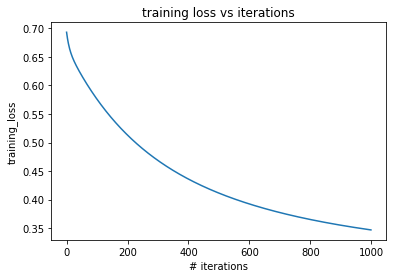

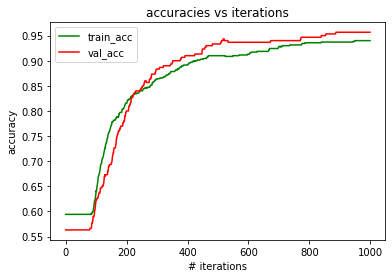

In [25]:
w,b=train_model(train_data,train_data_targets+0.0,test_data,test_data_targets+0.0,w_initial,b_initial,num_iters=1000)

In [26]:
print('w: ',w,'b: ',b)

w:  [[-0.36141331]
 [-0.68820591]
 [-0.81861798]
 [ 5.05891771]
 [-0.29389473]] b:  -0.8777059229807475


In [27]:
#predicting the test data
test_predictions=predictor(test_data,w,b)

In [28]:
TP,TN,FP,FN,precision,recall,F1_score=confusion_matrix_precision_recall_f1_score(test_data_targets,test_predictions)

In [29]:
print('TP:',TP,'TN:',TN,'FP:',FP,'FN:',FN)
print('F1 Score: ',F1_score)
print('precision: ',precision)
print('recall: ',recall)

TP: 162 TN: 125 FP: 6 FN: 7
F1 Score:  0.9614243323442135
precision:  0.9642857142857143
recall:  0.9585798816568047
